<a href="https://colab.research.google.com/github/KamilShape/credit_risk_analysis/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction and data load.

###1.1 Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1.2 Database analysis

Database link: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset

In [3]:
loan = pd.read_csv("/content/drive/MyDrive/loan.csv")

<ipython-input-3-09ca7cbc1256>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv("/content/drive/MyDrive/loan.csv")


In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data preprocessing

### 2.1 Selecting relevant columns

In [5]:
loan2 = loan[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc', 'purpose', 'dti', 'delinq_2yrs', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status', 'loan_status']]

In [6]:
loan2

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status
0,5000.0,36 months,10.65,162.87,B,10+ years,24000.0,credit_card,27.65,0.0,INDIVIDUAL,NaN,NaN,Verified,Fully Paid
1,2500.0,60 months,15.27,59.83,C,< 1 year,30000.0,car,1.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Charged Off
2,2400.0,36 months,15.96,84.33,C,10+ years,12252.0,small_business,8.72,0.0,INDIVIDUAL,NaN,NaN,Not Verified,Fully Paid
3,10000.0,36 months,13.49,339.31,C,10+ years,49200.0,other,20.00,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Fully Paid
4,3000.0,60 months,12.69,67.79,B,1 year,80000.0,other,17.94,0.0,INDIVIDUAL,NaN,NaN,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,8 years,31000.0,debt_consolidation,28.69,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887375,24000.0,36 months,11.99,797.03,B,10+ years,79000.0,home_improvement,3.90,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887376,13000.0,60 months,15.99,316.07,D,5 years,35000.0,debt_consolidation,30.90,0.0,INDIVIDUAL,NaN,NaN,Verified,Current
887377,12000.0,60 months,19.99,317.86,E,1 year,64400.0,debt_consolidation,27.19,1.0,INDIVIDUAL,NaN,NaN,Source Verified,Current


### 2.2 Removing NaN values

In [7]:
loan2.fillna(0, inplace = True)

<ipython-input-7-81e18bd3abfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2.fillna(0, inplace = True)


In [8]:
loan2

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status
0,5000.0,36 months,10.65,162.87,B,10+ years,24000.0,credit_card,27.65,0.0,INDIVIDUAL,0.0,0.0,Verified,Fully Paid
1,2500.0,60 months,15.27,59.83,C,< 1 year,30000.0,car,1.00,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Charged Off
2,2400.0,36 months,15.96,84.33,C,10+ years,12252.0,small_business,8.72,0.0,INDIVIDUAL,0.0,0.0,Not Verified,Fully Paid
3,10000.0,36 months,13.49,339.31,C,10+ years,49200.0,other,20.00,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Fully Paid
4,3000.0,60 months,12.69,67.79,B,1 year,80000.0,other,17.94,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,8 years,31000.0,debt_consolidation,28.69,0.0,INDIVIDUAL,0.0,0.0,Verified,Current
887375,24000.0,36 months,11.99,797.03,B,10+ years,79000.0,home_improvement,3.90,0.0,INDIVIDUAL,0.0,0.0,Verified,Current
887376,13000.0,60 months,15.99,316.07,D,5 years,35000.0,debt_consolidation,30.90,0.0,INDIVIDUAL,0.0,0.0,Verified,Current
887377,12000.0,60 months,19.99,317.86,E,1 year,64400.0,debt_consolidation,27.19,1.0,INDIVIDUAL,0.0,0.0,Source Verified,Current


### 2.3 Spliting loan_status into 3 categories
* 1 - low risk
* 2 - medium risk
* 3 - high risk






In [13]:
loan2.loc[loan2['loan_status'].isin(['Issued','Current','Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']), 'loan_category'] = 1
loan2.loc[loan2['loan_status'].isin(['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']), 'loan_category'] = 2
loan2.loc[loan2['loan_status'].isin(['Charged Off' , 'Does not meet the credit policy. Status:Charged Off', 'Default']), 'loan_category'] = 3

In [14]:
loan2

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,application_type,annual_inc_joint,dti_joint,verification_status,loan_status,loan_category
0,5000.0,36 months,10.65,162.87,B,10+ years,24000.0,credit_card,27.65,0.0,INDIVIDUAL,0.0,0.0,Verified,Fully Paid,1.0
1,2500.0,60 months,15.27,59.83,C,< 1 year,30000.0,car,1.00,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Charged Off,3.0
2,2400.0,36 months,15.96,84.33,C,10+ years,12252.0,small_business,8.72,0.0,INDIVIDUAL,0.0,0.0,Not Verified,Fully Paid,1.0
3,10000.0,36 months,13.49,339.31,C,10+ years,49200.0,other,20.00,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Fully Paid,1.0
4,3000.0,60 months,12.69,67.79,B,1 year,80000.0,other,17.94,0.0,INDIVIDUAL,0.0,0.0,Source Verified,Current,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,36 months,11.99,332.10,B,8 years,31000.0,debt_consolidation,28.69,0.0,INDIVIDUAL,0.0,0.0,Verified,Current,1.0
887375,24000.0,36 months,11.99,797.03,B,10+ years,79000.0,home_improvement,3.90,0.0,INDIVIDUAL,0.0,0.0,Verified,Current,1.0
887376,13000.0,60 months,15.99,316.07,D,5 years,35000.0,debt_consolidation,30.90,0.0,INDIVIDUAL,0.0,0.0,Verified,Current,1.0
887377,12000.0,60 months,19.99,317.86,E,1 year,64400.0,debt_consolidation,27.19,1.0,INDIVIDUAL,0.0,0.0,Source Verified,Current,1.0


### Data Visualisation

In [27]:
loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])

<ipython-input-27-5c15275ff2c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan2['int_range'] = pd.cut(loan2['int_rate'], bins = [5,10.01,14.01,18.01,22.01,26.01,29.01], labels = ['5-10','10-14','14-18','18-22','22-26','26-29'])


In [28]:
loan_int_range_df = pd.DataFrame(loan2['int_range'].value_counts()).reset_index().sort_values(by='index')

In [29]:
loan_int_range_df

,index,int_range
1,5-10,235629
0,10-14,305387
2,14-18,219855
3,18-22,95654
4,22-26,29213
5,26-29,1641


In [37]:
avg_rate_bygrade = pd.DataFrame(loan2.groupby('grade')['int_rate'].mean().reset_index())

In [38]:
avg_rate_bygrade

,grade,int_rate
0,A,7.243312
1,B,10.829618
2,C,13.980098
3,D,17.175814
4,E,19.897322
5,F,23.582787
6,G,25.626706


Text(0.5, 0, 'Grade')

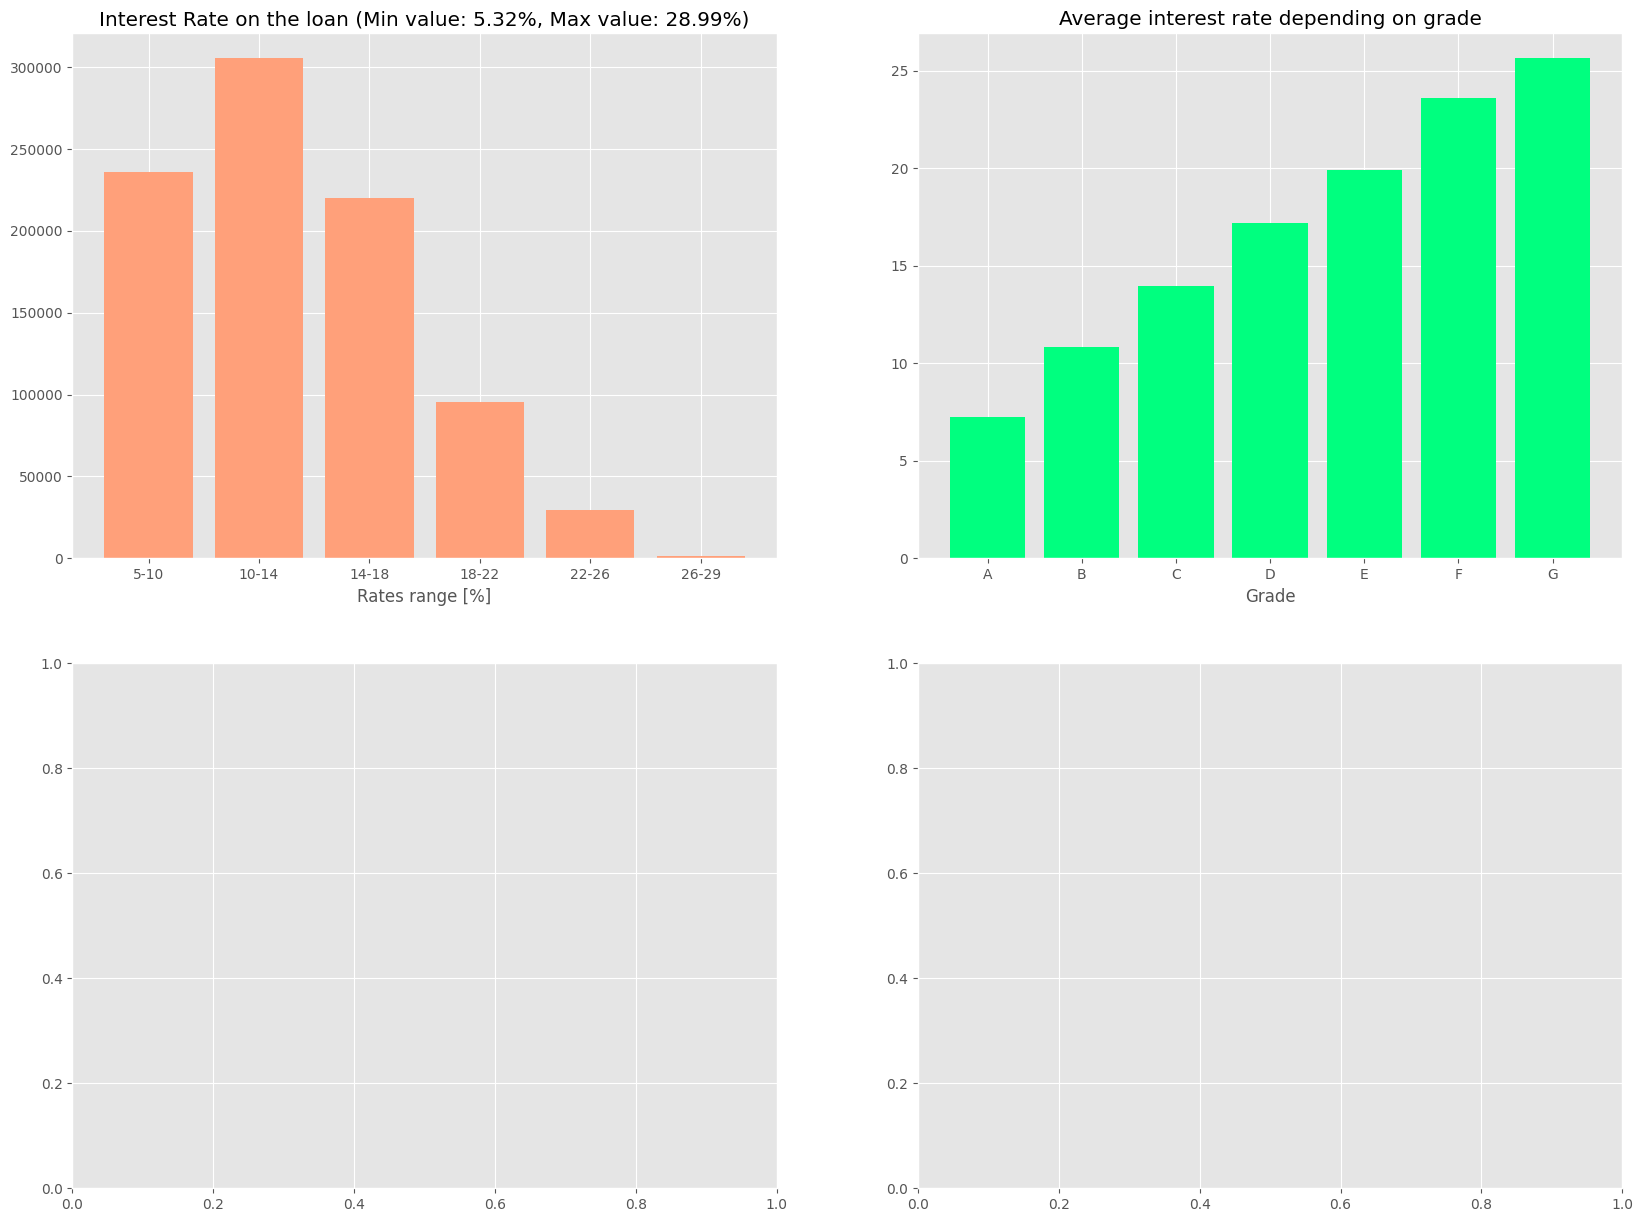

In [53]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2,2, figsize = (20,15))
#Interest Rate on the loan
ax[0,0].bar(loan_int_range_df['index'], loan_int_range_df['int_range'], color='lightsalmon')
ax[0,0].set_title('Interest Rate on the loan (Min value: 5.32%, Max value: 28.99%)')
ax[0,0].set_xlabel('Rates range [%]')
#Average interest rate depending on grade
ax[0,1].bar(avg_rate_bygrade['grade'], avg_rate_bygrade['int_rate'], color='springgreen')
ax[0,1].set_title('Average interest rate depending on grade')
ax[0,1].set_xlabel('Grade')